## EDA LAB - Nora Wiktorowicz -
Working in a group with Dean Chenzaie: mtk7hg@virginia.edu

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [ ]:
# imports
import requests
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Download a small (5-15) set of variables of interest.**

In [16]:
df = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet')
df = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet')
df = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet')


In [24]:
var_list = ['papres16', 'mapres10', 'degree', 'rincome', 'hrs2', 'marital', 'agewed', 'padeg', 'madeg'] # List of variables you want to save
output_variables = 'selected_gss_data.csv' # Name of the file you want to save the data to
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

# **2. Write a short description of the data you chose, and why. (1 page)**

We selected the variables [papres16, mapres16, degree, rincome, hrs2, marital, agewed, padeg, madeg] in order to investigate how the circumstances of an individual’s parents may affect their lifestyle. I first became interested in exploring this topic while attending UVA, a prestigious university, where I noticed that a disproportionate number of students hailed from a wealthy background. It’s not difficult to imagine why that is, considering they probably had access to many more resources, but considering that the US has historically been revered as a meritocratic society–hence the American Dream–I wanted to conversely learn more about if the children of parents who weren’t rich in resources could reverse this cycle.

# **3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.**

In [70]:
df = pd.read_csv(output_variables) #load data with my selected variables
print(df.info()) #print data to ensure that the correct variables are selected and view variable information. We see that the variables match with our selected data.
print(df.head()) #print first few rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   papres16  22300 non-null  float64
 1   mapres10  26352 non-null  float64
 2   degree    72194 non-null  object 
 3   rincome   42333 non-null  object 
 4   hrs2      1401 non-null   float64
 5   marital   72339 non-null  object 
 6   agewed    26543 non-null  float64
 7   padeg     54509 non-null  object 
 8   madeg     63419 non-null  object 
dtypes: float64(4), object(5)
memory usage: 5.0+ MB
None
   papres16  mapres10                 degree rincome  hrs2        marital  \
0      40.0       NaN             bachelor's     NaN   NaN  never married   
1      50.0       NaN  less than high school     NaN   NaN        married   
2      32.0       NaN            high school     NaN   NaN        married   
3      72.0       NaN             bachelor's     NaN   NaN        married   
4      48.0       NaN

We see that there are many instances of missing data, especially within the mapres10, rincome, and hrs2 variables. To improve data quality, we want to drop rows with missing data.

In [71]:
df = df.dropna(subset=['rincome', 'mapres10', 'hrs2']) #we want to drop rows with missing data, specifically in the mapres10, rincome, and hrs2 variables. If we drop all rows with missing data from each variable, the dataset may be empty (as there are many missing values).
print(df.head()) #print the first 5 rows to examine changes


       papres16  mapres10       degree           rincome  hrs2        marital  \
29432       NaN      48.0  high school  $1,000 to $2,999  50.0  never married   
29495       NaN      38.0  high school  $3,000 to $3,999  20.0      separated   
29529       NaN      69.0  high school   $25,000 or more  30.0        widowed   
29660       NaN      28.0  high school   $25,000 or more  40.0       divorced   
29781       NaN      64.0     graduate   $25,000 or more  40.0        married   

       agewed                  padeg                  madeg  
29432     NaN               graduate            high school  
29495    18.0                    NaN                    NaN  
29529    21.0                    NaN            high school  
29660    17.0  less than high school  less than high school  
29781     NaN            high school            high school  


Next, we want to convert all numeric variables to floats, and all categorical variables to categories. This will allow us to further analyze the data.

In [73]:
df['papres16'] = pd.to_numeric(df['papres16'], errors='coerce') #Convert numeric values
df['mapres10'] = pd.to_numeric(df['mapres10'], errors='coerce')
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')
df['agewed'] = pd.to_numeric(df['agewed'], errors='coerce')

df['degree'] = df['degree'].astype('category') #Convert categorical variables
df['rincome'] = df['rincome'].astype('category')
df['marital'] = df['marital'].astype('category')
df['padeg'] = df['padeg'].astype('category')
df['madeg'] = df['madeg'].astype('category')

print(df.dtypes) #Examine the datatypes to ensure accuracy


papres16     float64
mapres10     float64
degree      category
rincome     category
hrs2         float64
marital     category
agewed       float64
padeg       category
madeg       category
dtype: object


# **4. Produce some numeric summaries and visualizations. (1-3 pages)**

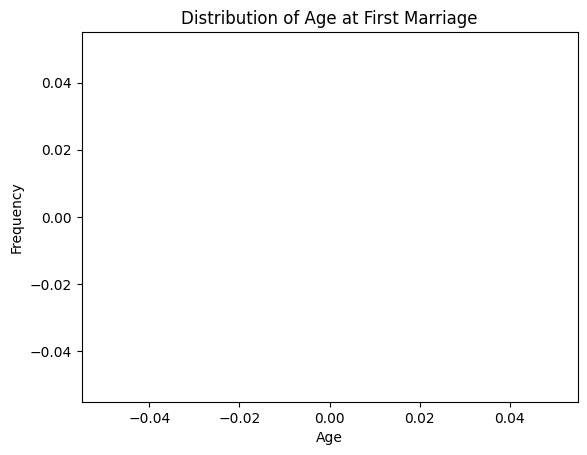

In [41]:
sns.histplot(df['agewed'].dropna(), bins=20, kde=True)
plt.title('Distribution of Age at First Marriage')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#make histogram
plt.hist(airbnb['Price'], bins=20, edgecolor='black')
plt.title('Histogram Distribution of Price (Price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()